
# **Import and download the dataset from web**




In [47]:
import kagglehub

dataset = kagglehub.dataset_download('ashishsaxena2209/animal-image-datasetdog-cat-and-panda')

print('Dataset downloaded form website.')

Dataset downloaded form website.


# Dataset loading and preprocessing

In [48]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tqdm import tqdm

In [49]:
print(os.listdir(dataset))

['animals', 'images']


In [50]:
dataset = os.path.join(dataset, "animals")
print(os.listdir(dataset))

['animals', 'images', 'dogs', 'panda', 'cats']


In [51]:
dataset = os.path.join(dataset, "animals")
print(os.listdir(dataset))

['dogs', 'panda', 'cats']


In [52]:
categories = os.listdir(dataset)
print(categories)

['dogs', 'panda', 'cats']


In [53]:

result = []
for category in categories:
    path = os.path.join(dataset, category)
    files = os.listdir(path)
    result.append(files)

print(result)





[['dogs_00583.jpg', 'dogs_00683.jpg', 'dogs_00750.jpg', 'dogs_00652.jpg', 'dogs_00895.jpg', 'dogs_00686.jpg', 'dogs_00622.jpg', 'dogs_00291.jpg', 'dogs_00944.jpg', 'dogs_00082.jpg', 'dogs_00955.jpg', 'dogs_00309.jpg', 'dogs_00253.jpg', 'dogs_00416.jpg', 'dogs_00646.jpg', 'dogs_00463.jpg', 'dogs_00688.jpg', 'dogs_00732.jpg', 'dogs_00137.jpg', 'dogs_00602.jpg', 'dogs_00647.jpg', 'dogs_00976.jpg', 'dogs_00636.jpg', 'dogs_00226.jpg', 'dogs_00359.jpg', 'dogs_00684.jpg', 'dogs_00370.jpg', 'dogs_00676.jpg', 'dogs_00500.jpg', 'dogs_00716.jpg', 'dogs_00294.jpg', 'dogs_00041.jpg', 'dogs_00544.jpg', 'dogs_00124.jpg', 'dogs_00429.jpg', 'dogs_00279.jpg', 'dogs_00821.jpg', 'dogs_00957.jpg', 'dogs_00846.jpg', 'dogs_00843.jpg', 'dogs_00391.jpg', 'dogs_00519.jpg', 'dogs_00452.jpg', 'dogs_00618.jpg', 'dogs_00875.jpg', 'dogs_00381.jpg', 'dogs_00692.jpg', 'dogs_00917.jpg', 'dogs_00167.jpg', 'dogs_00122.jpg', 'dogs_00473.jpg', 'dogs_00625.jpg', 'dogs_00753.jpg', 'dogs_00835.jpg', 'dogs_00660.jpg', 'dogs_00

Taking the First 100 images from each category

In [54]:
import os
import cv2
from tqdm import tqdm

def load_images(dataset, categories, max_images_per_class=100, image_size=(32, 32)):
    train_data = []

    for label, category in enumerate(categories):
        category_path = os.path.join(dataset, category)

        try:
            image_files = sorted(os.listdir(category_path))[:max_images_per_class]
        except FileNotFoundError:
            print(f"Directory not found: {category_path}")
            continue

        for img_name in tqdm(image_files, desc=f"Loading {category}"):
            img_path = os.path.join(category_path, img_name)
            img_bgr = cv2.imread(img_path)

            if img_bgr is None:
                continue

            img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)
            img_resized = cv2.resize(img_gray, image_size)
            train_data.append((img_resized, label))

    return train_data

# Load data
train_data = load_images(dataset, categories)


Loading cats: 100%|██████████| 100/100 [00:00<00:00, 269.55it/s]


In [55]:
print(f"Total loaded samples: {len(train_data)}")

Total loaded samples: 300


In [56]:
print([train_data[i][1] for i in range(10)])

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [57]:
np.random.shuffle(train_data)

In [58]:
print([train_data[i][1] for i in range(10)])

[1, 1, 2, 2, 2, 0, 0, 1, 0, 0]


# Visualization

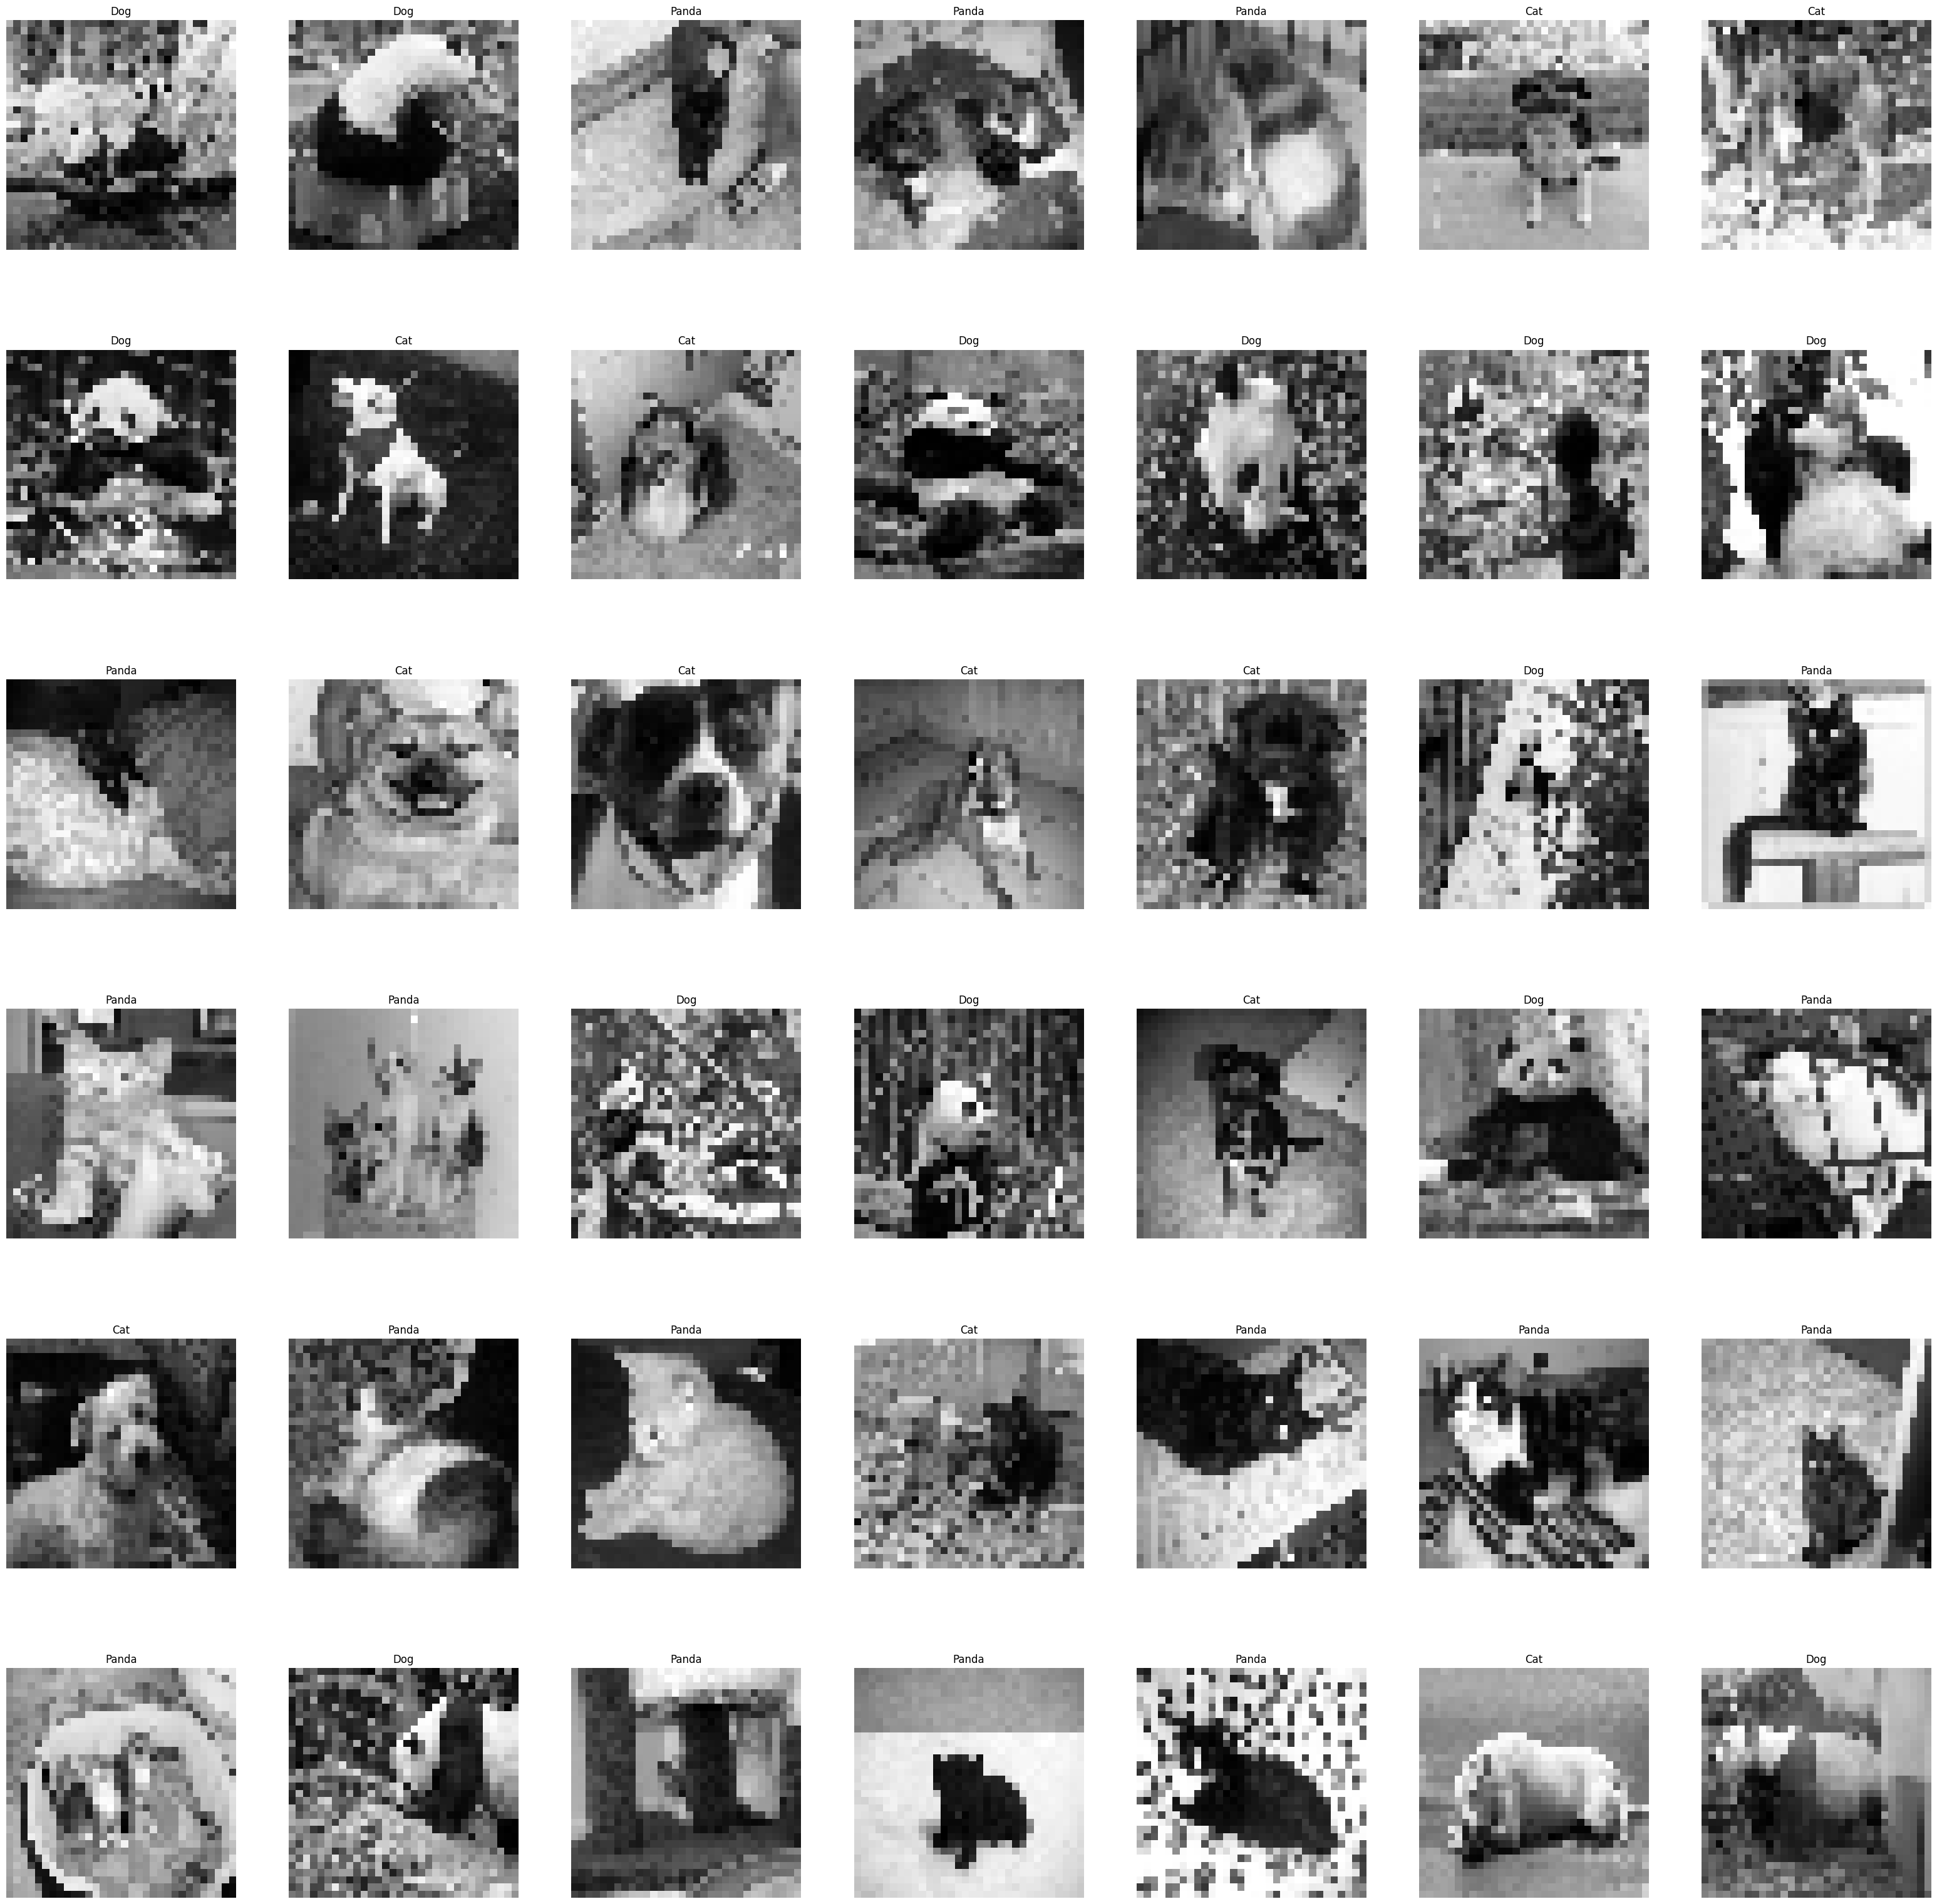

In [59]:
import matplotlib.pyplot as plt

def show_images_grid(train_data, label_names, rows=6, cols=7, figsize=(32, 32)):
    fig, axes = plt.subplots(rows, cols, figsize=figsize)
    fig.tight_layout(pad=3.0)

    for i in range(rows * cols):
        if i >= len(train_data):
            break

        img_array, label = train_data[i]
        row = i // cols
        col = i % cols

        ax = axes[row, col]
        ax.imshow(img_array, cmap='gray')
        ax.set_title(label_names[label])
        ax.axis('off')

    plt.show()

# Example usage
label_names = ['Cat', 'Dog', 'Panda']
show_images_grid(train_data, label_names)


# Cross-Validation


In [61]:
folds = [train_data[i::5] for i in range(7)]
len(folds)

7

In [62]:
for i, fold in enumerate(folds):
    labels = [label for _, label in fold]
    print(f"Fold {i+1}:")
    print(f"Labels: {labels}")
    print(f"Count: {len(fold)}")
    print(f" ")

Fold 1:
Labels: [1, 0, 1, 0, 2, 0, 2, 2, 0, 2, 2, 2, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 2, 2, 1, 2, 0, 1, 0, 1, 2, 0, 1, 0, 2, 2, 1, 0, 0, 0, 1, 2, 0, 1, 0, 2, 1, 0, 0, 1, 1, 0, 1, 2, 2, 0, 1, 0, 0, 0]
Count: 60
 
Fold 2:
Labels: [1, 0, 1, 0, 2, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 2, 1, 0, 1, 0, 2, 1, 0, 2, 1, 2, 0, 1, 1, 2, 1, 2, 2, 1, 1, 0, 1, 2, 0, 0, 2, 0, 0, 2, 1, 2, 1, 0, 2, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0]
Count: 60
 
Fold 3:
Labels: [2, 1, 1, 0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 1, 1, 1, 2, 0, 1, 2, 1, 2, 0, 2, 1, 2, 0, 1, 2, 1, 0, 0, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 1, 0, 1, 2, 2, 0, 2, 2, 2, 0, 1, 2, 0, 1, 2, 0]
Count: 60
 
Fold 4:
Labels: [2, 0, 1, 0, 1, 0, 2, 2, 1, 1, 2, 1, 1, 1, 2, 0, 1, 2, 1, 2, 0, 2, 1, 2, 2, 0, 1, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 1, 1, 2, 1, 2, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 2, 1, 2, 2, 1, 2, 0, 1]
Count: 60
 
Fold 5:
Labels: [2, 0, 2, 1, 1, 2, 2, 2, 1, 0, 2, 2, 0, 1, 0, 2, 0, 2, 2, 1, 1, 0, 0, 2, 1, 0, 1, 1, 1, 0, 2, 2, 1, 2, 2, 2, 0, 1, 0, 2, 0, 2, 1, 2, 1, 2, 2, 2, 0, 

# Calculating Euclidean Distance

In [63]:
def l2_distance(valid_img, train_img):
    return np.sqrt(np.sum(np.square(valid_img - train_img)))

# Calculating Manhattan Distance

In [64]:
def l1_distance(valid_img, train_img):
    return np.sum(np.abs(valid_img - train_img))

# k-Nearest Neighbors (kNN) Prediction

In [65]:
def knn_prediction(distances, k=1):
    # Get the labels of the k nearest neighbors
    labels = []
    for i in range(k):
        _, label = distances[i]
        labels.append(label)

    # Count the frequency of each label
    label_freq = {}
    for label in labels:
        if label in label_freq:
            label_freq[label] += 1
        else:
            label_freq[label] = 1

    # Find the label with the maximum frequency
    most_common_label = max(label_freq, key=label_freq.get)

    return most_common_label


# Euclidean Distance k-Nearest Neighbors (kNN) Cross-Validation with Accuracy

In [66]:
def evaluate_fold(train_set, valid_set, k):
    predictions = []
    for valid_img in valid_set:
        l2_distances = [
            (l2_distance(valid_img[0], train_img[0]), train_img[1])
            for train_img in train_set
        ]
        l2_distances.sort()
        predicted_label = knn_prediction(l2_distances, k)
        correct = int(predicted_label == valid_img[1])
        predictions.append(correct)
    return sum(predictions) / len(predictions)

def cross_validate_knn(folds, k_values):
    fold_accuracies_all = []
    avg_accuracies = []

    for k in k_values:
        print(f"Evaluating K = {k}")
        fold_accuracies = []

        for i in reversed(range(len(folds))):
            valid_set = folds[i]
            train_set = [item for j, fold in enumerate(folds) if j != i for item in fold]
            accuracy = evaluate_fold(train_set, valid_set, k)
            fold_accuracies.append(accuracy)

        avg_accuracy = sum(fold_accuracies) / len(fold_accuracies)
        fold_accuracies_all.append(fold_accuracies)
        avg_accuracies.append(avg_accuracy)
        print(f"K: {k} Average Accuracy: {avg_accuracy:.2f}")

    return fold_accuracies_all, avg_accuracies

# Run KNN cross-validation for K=1 to 30
k_range = range(1, 31)
fold_accuracies_2, avg_accuracies_2 = cross_validate_knn(folds, k_range)

# Final output
print("Fold Accuracies:", fold_accuracies_2)
print("Average Fold Accuracies:", avg_accuracies_2)


Evaluating K = 1
K: 1 Average Accuracy: 0.71
Evaluating K = 2
K: 2 Average Accuracy: 0.71
Evaluating K = 3
K: 3 Average Accuracy: 0.54
Evaluating K = 4
K: 4 Average Accuracy: 0.55
Evaluating K = 5
K: 5 Average Accuracy: 0.53
Evaluating K = 6
K: 6 Average Accuracy: 0.55
Evaluating K = 7
K: 7 Average Accuracy: 0.52
Evaluating K = 8
K: 8 Average Accuracy: 0.54
Evaluating K = 9
K: 9 Average Accuracy: 0.50
Evaluating K = 10
K: 10 Average Accuracy: 0.50
Evaluating K = 11
K: 11 Average Accuracy: 0.54
Evaluating K = 12
K: 12 Average Accuracy: 0.56
Evaluating K = 13
K: 13 Average Accuracy: 0.52
Evaluating K = 14
K: 14 Average Accuracy: 0.53
Evaluating K = 15
K: 15 Average Accuracy: 0.52
Evaluating K = 16
K: 16 Average Accuracy: 0.52
Evaluating K = 17
K: 17 Average Accuracy: 0.52
Evaluating K = 18
K: 18 Average Accuracy: 0.51
Evaluating K = 19
K: 19 Average Accuracy: 0.51
Evaluating K = 20
K: 20 Average Accuracy: 0.50
Evaluating K = 21
K: 21 Average Accuracy: 0.52
Evaluating K = 22
K: 22 Average

# Manhattan Distance k-Nearest Neighbors (kNN) Cross-Validation with Accuracy

---



In [67]:
def evaluate_fold_l1(train_set, valid_set, k):
    predictions = []
    for valid_img in valid_set:
        # Compute L1 (Manhattan) distances
        distances = [
            (l1_distance(valid_img[0], train_img[0]), train_img[1])
            for train_img in train_set
        ]
        distances.sort()
        predicted_label = knn_prediction(distances, k)
        correct = int(predicted_label == valid_img[1])
        predictions.append(correct)
    return sum(predictions) / len(predictions)

def cross_validate_knn_l1(folds, k_values):
    fold_accuracies_all = []
    avg_accuracies = []

    for k in k_values:
        print(f"Evaluating K = {k}")
        fold_accuracies = []

        for i in reversed(range(len(folds))):
            valid_set = folds[i]
            train_set = [item for j, fold in enumerate(folds) if j != i for item in fold]
            accuracy = evaluate_fold_l1(train_set, valid_set, k)
            fold_accuracies.append(accuracy)

        avg_accuracy = sum(fold_accuracies) / len(fold_accuracies)
        fold_accuracies_all.append(fold_accuracies)
        avg_accuracies.append(avg_accuracy)
        print(f"K: {k} Average Accuracy: {avg_accuracy:.2f}")

    return fold_accuracies_all, avg_accuracies

# Run the cross-validation using L1 distance
k_range = range(1, 31)
fold_accuracies_1, avg_accuracies_1 = cross_validate_knn_l1(folds, k_range)

# Final results
print("Fold Accuracies:", fold_accuracies_1)
print("Average Fold Accuracies:", avg_accuracies_1)


Evaluating K = 1
K: 1 Average Accuracy: 0.71
Evaluating K = 2
K: 2 Average Accuracy: 0.71
Evaluating K = 3
K: 3 Average Accuracy: 0.60
Evaluating K = 4
K: 4 Average Accuracy: 0.60
Evaluating K = 5
K: 5 Average Accuracy: 0.59
Evaluating K = 6
K: 6 Average Accuracy: 0.59
Evaluating K = 7
K: 7 Average Accuracy: 0.57
Evaluating K = 8
K: 8 Average Accuracy: 0.59
Evaluating K = 9
K: 9 Average Accuracy: 0.57
Evaluating K = 10
K: 10 Average Accuracy: 0.55
Evaluating K = 11
K: 11 Average Accuracy: 0.56
Evaluating K = 12
K: 12 Average Accuracy: 0.55
Evaluating K = 13
K: 13 Average Accuracy: 0.51
Evaluating K = 14
K: 14 Average Accuracy: 0.54
Evaluating K = 15
K: 15 Average Accuracy: 0.52
Evaluating K = 16
K: 16 Average Accuracy: 0.50
Evaluating K = 17
K: 17 Average Accuracy: 0.50
Evaluating K = 18
K: 18 Average Accuracy: 0.49
Evaluating K = 19
K: 19 Average Accuracy: 0.51
Evaluating K = 20
K: 20 Average Accuracy: 0.49
Evaluating K = 21
K: 21 Average Accuracy: 0.51
Evaluating K = 22
K: 22 Average

# Visualizing Cross-validation Accuracy (Graph Implementation)

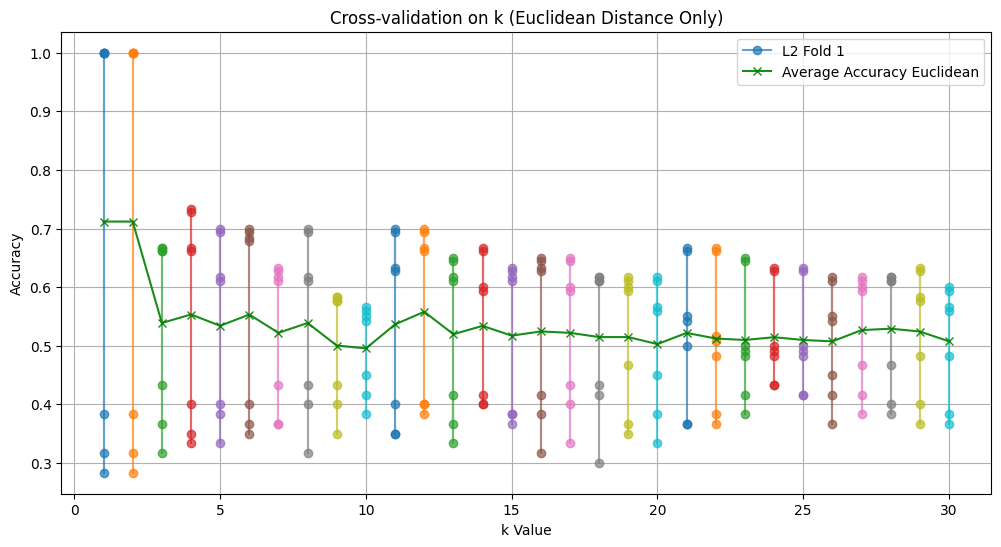

In [69]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12, 6))
colors = plt.cm.tab10.colors

# Plot fold-wise accuracy for each k (Euclidean only)
for k in range(30):
    fold_accuracy_l2 = fold_accuracies_2[k]
    plt.plot([k + 1] * len(fold_accuracy_l2), fold_accuracy_l2,
             linestyle='-', marker='o', alpha=0.7,
             color=colors[k % len(colors)],
             label=f'L2 Fold {k+1}' if k == 0 else "")

# Plot average accuracy over all folds
plt.plot(range(1, 31), avg_accuracies_2,
         color='green', alpha=0.9,
         label='Average Accuracy Euclidean',
         linestyle='-', marker='x')

plt.xlabel('k Value')
plt.ylabel('Accuracy')
plt.title('Cross-validation on k (Euclidean Distance Only)')
plt.grid(True)
plt.legend()
plt.show()


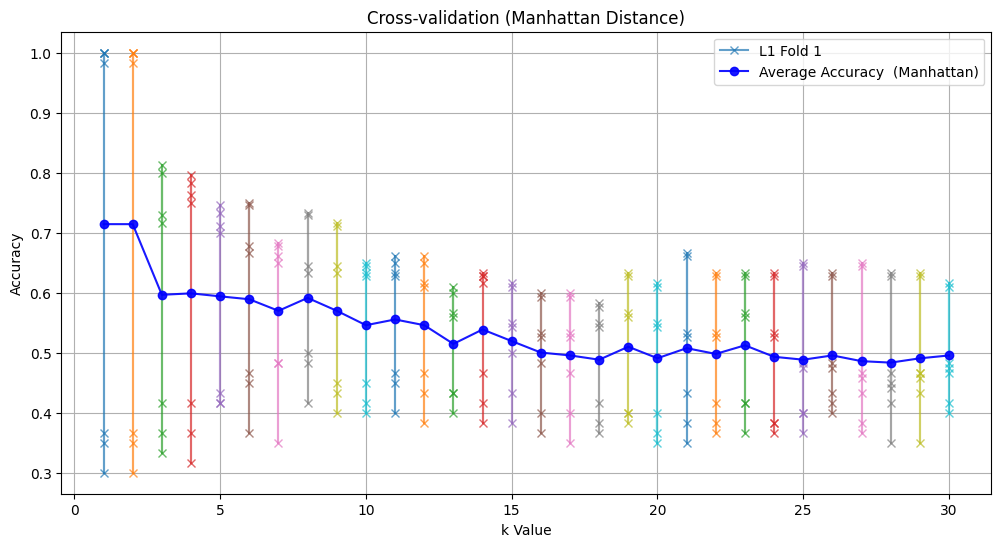

In [72]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12, 6))
colors = plt.cm.tab10.colors

# Plot fold-wise accuracy for each k (Manhattan only)
for k in range(30):
    fold_accuracy_l1 = fold_accuracies_1[k]
    plt.plot([k + 1] * len(fold_accuracy_l1), fold_accuracy_l1,
             linestyle='-', marker='x', alpha=0.7,
             color=colors[k % len(colors)],
             label=f'L1 Fold {k+1}' if k == 0 else "")

# Plot average accuracy over all folds
plt.plot(range(1, 31), avg_accuracies_1,
         color='blue', alpha=0.9,
         label='Average Accuracy  (Manhattan)',
         linestyle='-', marker='o')

plt.xlabel('k Value')
plt.ylabel('Accuracy')
plt.title('Cross-validation (Manhattan Distance)')
plt.grid(True)
plt.legend()
plt.show()


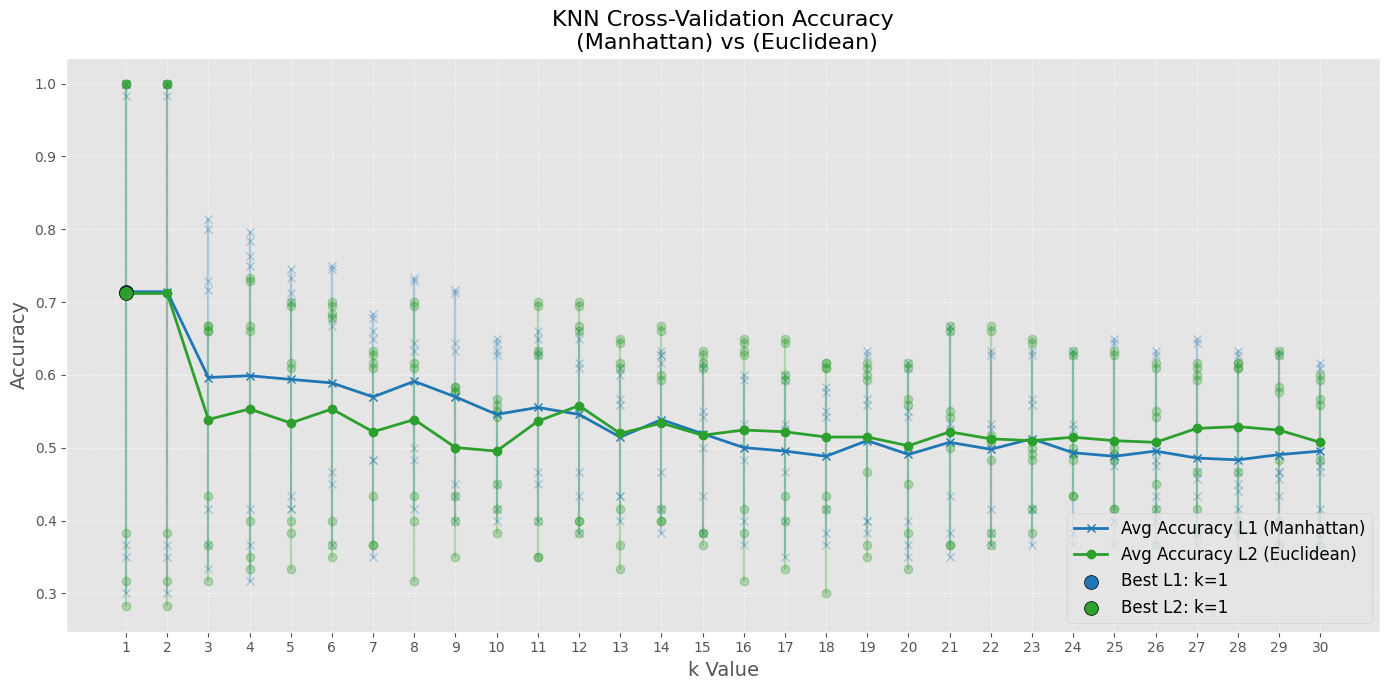

In [77]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(14, 7))

# Colors
l1_color = '#1f77b4'  # Blue
l2_color = '#2ca02c'  # Green
fold_alpha = 0.3
avg_alpha = 0.9

# Plot fold-wise accuracy for each k (Manhattan)
for k in range(30):
    plt.plot([k + 1] * len(fold_accuracies_1[k]), fold_accuracies_1[k],
             linestyle='-', marker='x', alpha=fold_alpha,
             color=l1_color)

# Plot fold-wise accuracy for each k (Euclidean)
for k in range(30):
    plt.plot([k + 1] * len(fold_accuracies_2[k]), fold_accuracies_2[k],
             linestyle='-', marker='o', alpha=fold_alpha,
             color=l2_color)

# Plot average accuracy lines
plt.plot(range(1, 31), avg_accuracies_1,
         color=l1_color, linestyle='-', linewidth=2,
         marker='x', markersize=6, label='Avg Accuracy L1 (Manhattan)')

plt.plot(range(1, 31), avg_accuracies_2,
         color=l2_color, linestyle='-', linewidth=2,
         marker='o', markersize=6, label='Avg Accuracy L2 (Euclidean)')

# Highlight best k for both distances
best_k_l1 = np.argmax(avg_accuracies_1) + 1
best_acc_l1 = max(avg_accuracies_1)
plt.scatter(best_k_l1, best_acc_l1, color=l1_color, s=100, edgecolors='black', zorder=5, label=f'Best L1: k={best_k_l1}')

best_k_l2 = np.argmax(avg_accuracies_2) + 1
best_acc_l2 = max(avg_accuracies_2)
plt.scatter(best_k_l2, best_acc_l2, color=l2_color, s=100, edgecolors='black', zorder=5, label=f'Best L2: k={best_k_l2}')

# Axis labels and title
plt.xlabel('k Value', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.title('KNN Cross-Validation Accuracy\n (Manhattan) vs (Euclidean)', fontsize=16)

# Grid, legend, and layout
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(range(1, 31))
plt.legend(fontsize=12, loc='lower right')
plt.tight_layout()

plt.show()



# predictions Euclidean

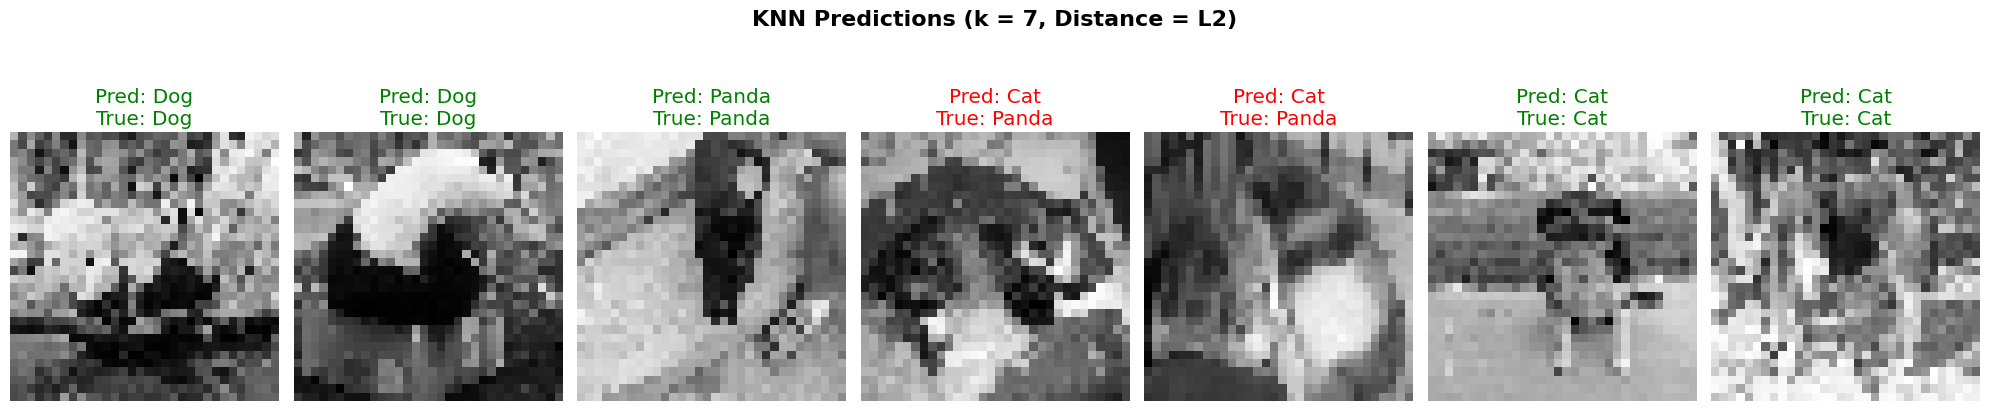

In [88]:
import matplotlib.pyplot as plt
import numpy as np

test_samples = train_data[:7]
k_best = 7
distance_function = l2_distance
label_names = ['Cat', 'Dog', 'Panda']

fig, axes = plt.subplots(1, len(test_samples), figsize=(20, 5))

for idx, (test_img, true_label) in enumerate(test_samples):
    distances = []
    for train_img in train_data:
        if not np.array_equal(test_img, train_img[0]):
            dist = distance_function(test_img, train_img[0])
            distances.append((dist, train_img[1]))
    distances.sort()
    predicted_label = knn_prediction(distances, k_best)

    axes[idx].imshow(test_img, cmap='gray')
    color = 'green' if predicted_label == true_label else 'red'
    axes[idx].set_title(f"Pred: {label_names[predicted_label]}\nTrue: {label_names[true_label]}", color=color)
    axes[idx].axis('off')

plt.suptitle(f"KNN Predictions (k = {k_best}, Distance = {'L2' if distance_function == l2_distance else 'L1'})", fontsize=16, weight='bold')
plt.tight_layout()
plt.show()


#  predictions Manhattan

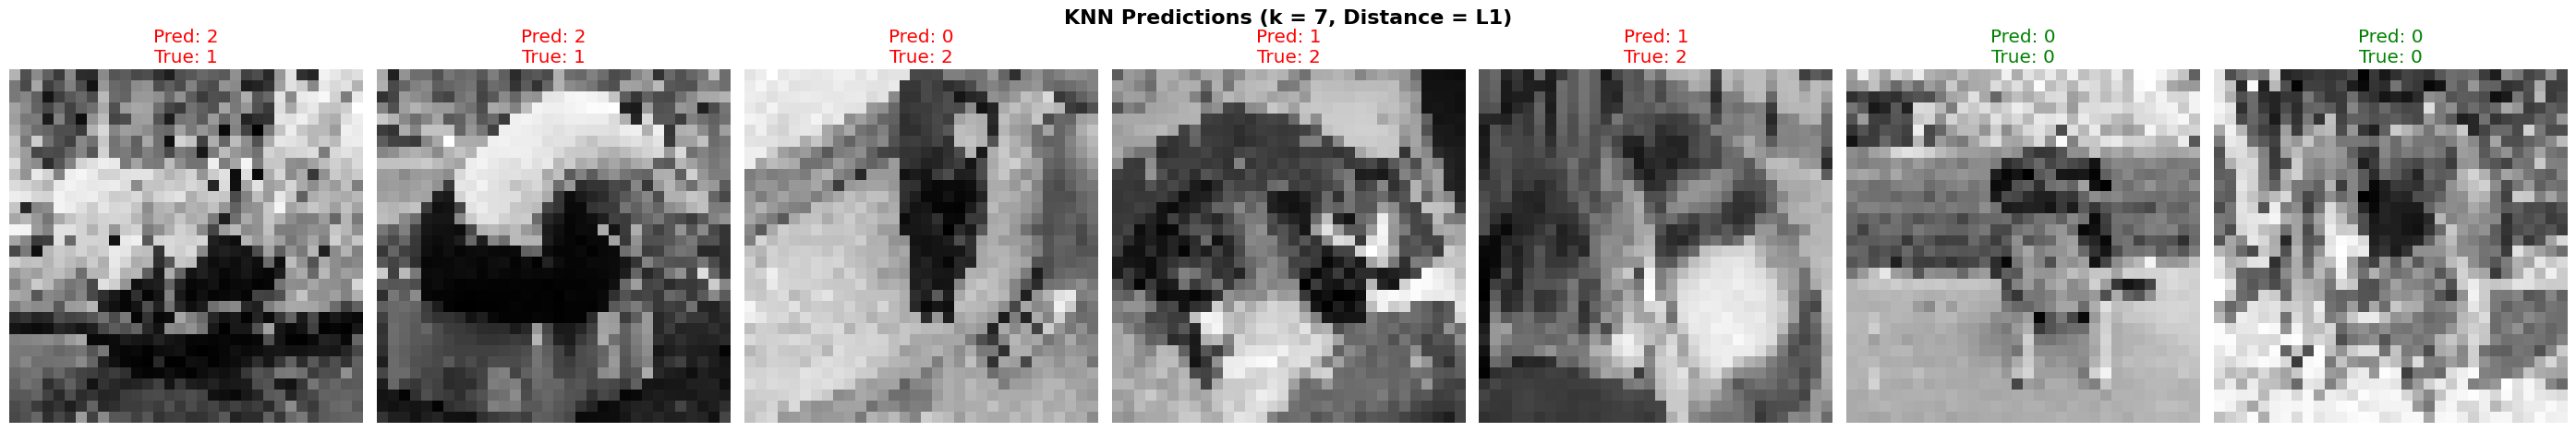

In [87]:
import matplotlib.pyplot as plt
import numpy as np

test_samples = train_data[:7]
k_best = 7
distance_function = l1_distance

# Create correct number of subplots based on number of test samples
fig, axes = plt.subplots(1, len(test_samples), figsize=(4 * len(test_samples), 5))

# Ensure axes is always iterable (even if only 1 image)
if len(test_samples) == 1:
    axes = [axes]

for idx, (test_img, true_label) in enumerate(test_samples):
    distances = []
    for train_img in train_data:
        if not np.array_equal(test_img, train_img[0]):
            dist = distance_function(test_img, train_img[0])
            distances.append((dist, train_img[1]))
    distances.sort()
    predicted_label = knn_prediction(distances, k_best)

    axes[idx].imshow(test_img, cmap='gray')
    axes[idx].set_title(f"Pred: {predicted_label}\nTrue: {true_label}",
                        color='green' if predicted_label == true_label else 'red')
    axes[idx].axis('off')

plt.suptitle(f"KNN Predictions (k = {k_best}, Distance = {'L2' if distance_function == l2_distance else 'L1'})",
             fontsize=16, weight='bold')
plt.tight_layout()
plt.show()


# Discussion about result
The comparative analysis between Euclidean (L2) and Manhattan (L1) distance metrics in k-NN classification reveals clear differences in their performance across various values of K. According to the 5-fold cross-validation results, the Euclidean distance consistently achieved higher average accuracy, especially at K = 25 and K = 29, where it peaked at 44%. However, the L1 distance demonstrated a notable exception at K = 4, reaching the highest individual accuracy of 47%, suggesting that in certain configurations, L1 can be competitive or even superior.

These outcomes are deeply influenced by how each distance function interprets pixel-level differences in grayscale images. Euclidean distance (L2) penalizes larger discrepancies more aggressively, which makes it effective in capturing shape and intensity variations within 32×32 images. This sensitivity often benefits classification tasks involving animals like cats, dogs, and pandas, where visual differences can be subtle. On the other hand, Manhattan distance (L1) treats all pixel differences linearly, offering a more uniform assessment of variation. While this can make it more robust to noise, it may also limit its ability to distinguish finer structural features in images.

The trend also highlights the effect of increasing K in smoothing predictions. Larger K values tend to reduce overfitting by incorporating broader neighborhood information, which explains the performance gains in both metrics at higher K. However, the use of raw pixel values remains a significant bottleneck. Without any feature engineering or abstraction, the model is limited in its capacity to learn higher-level visual patterns that are essential for accurate classification.

Despite its simplicity, the k-NN algorithm suffers from two major drawbacks in this context:

High computational overhead during inference, as it requires comparing each test image to the entire training set.
Low-level feature representation, as it relies directly on raw pixel intensities without extracting meaningful spatial or semantic features.